## Importing Packages

In [137]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [139]:
#loadding data
insurance_data = pd.read_csv("cleaned_Medical_Cost_Personal_Datasets.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [141]:
# replacing categorical variables with numerical variables
# male=0, female=1
insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)
# smoker=0 nonsmoker=1
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
# southeast region=0 southwest region=0 northeast region=0 northwest region=0 
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

/var/folders/qx/ynlh2vwj6fg_ypr59jccp3200000gn/T/ipykernel_55403/2262472320.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)
/var/folders/qx/ynlh2vwj6fg_ypr59jccp3200000gn/T/ipykernel_55403/2262472320.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
/var/folders/qx/ynlh2vwj6fg_ypr59jccp3200000gn/T/ipykernel_55403/2262472320.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and

In [143]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


## Splitting the data into Training data & Testing Data

In [146]:
x_train,x_test,y_train,y_test=train_test_split(insurance_data.drop('charges',axis=1),insurance_data['charges'],test_size=0.15, random_state=42)

In [148]:
x_train.shape, x_test.shape

((1136, 6), (201, 6))

In [150]:
y_train.shape, y_test.shape

((1136,), (201,))

## Fitting data to a Liner Regression

In [153]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred_linear = regressor.predict(x_test)

print('mean_absolute_error : ',mean_absolute_error(y_test,y_pred_linear))
print('mean_squared_error : ',mean_squared_error(y_test,y_pred_linear))
print('r2_score : ' ,r2_score(y_test,y_pred_linear))

mean_absolute_error :  4213.091499938853
mean_squared_error :  35643223.40616935
r2_score :  0.799626606535073


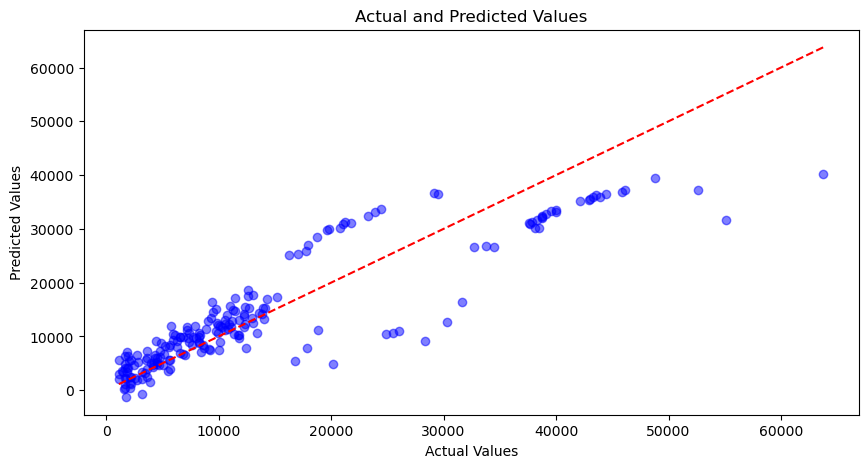

In [155]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred_linear,alpha=0.5,color="blue",label="Predictions")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual and Predicted Values")
plt.show()

## Fitting data to a Random Forest Regressor

In [128]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred_rfr = rfr.predict(x_test)

print('mean_absolute_error : ',mean_absolute_error(y_test,y_pred_rfr))
print('mean_squared_error : ',mean_squared_error(y_test,y_pred_rfr))
print('r2_score : ' ,r2_score(y_test,y_pred_rfr))

mean_absolute_error :  2665.4006507515674
mean_squared_error :  22497602.16190196
r2_score :  0.8735265652425837


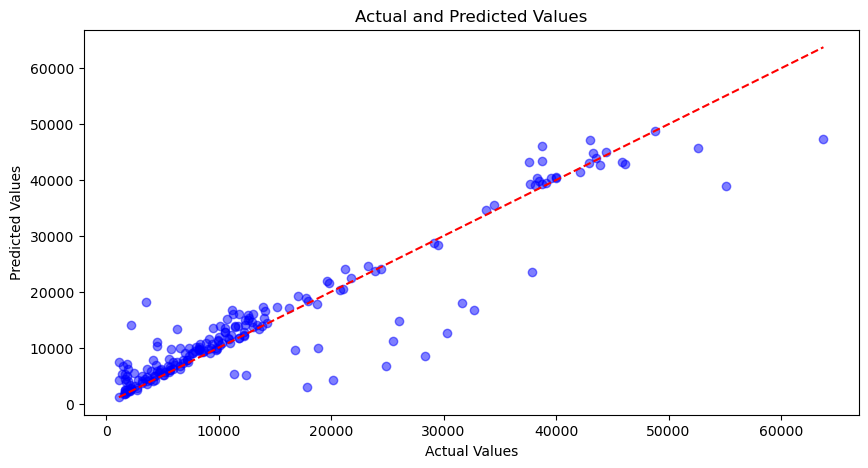

In [133]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred_rfr,alpha=0.5,color="blue",label="Predictions")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual and Predicted Values")
plt.show()

## Fitting data to a Lasso Regressor

In [118]:
lasso=Lasso()
lasso.fit(x_train,y_train)
y_pred_lasso = lasso.predict(x_test)

print('mean_absolute_error : ',mean_absolute_error(y_test,y_pred_lasso))
print('mean_squared_error : ',mean_squared_error(y_test,y_pred_lasso))
print('r2_score : ' ,r2_score(y_test,y_pred_lasso))

mean_absolute_error :  4213.740675419911
mean_squared_error :  35648125.930417724
r2_score :  0.799599046305489


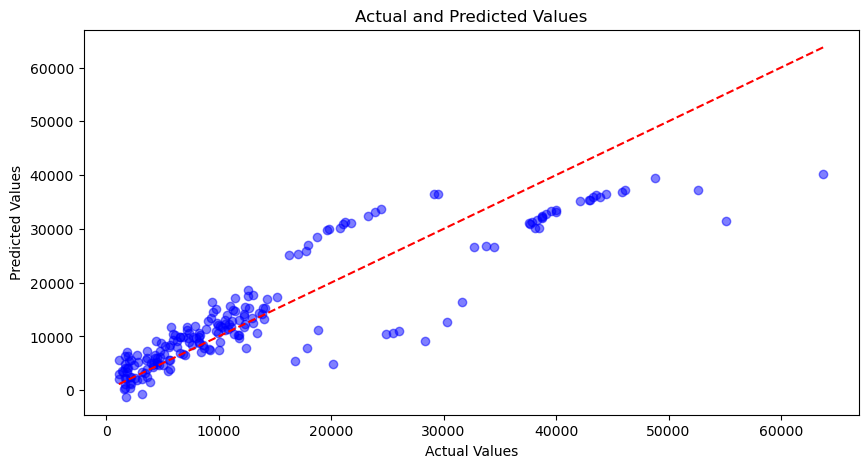

In [159]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred_lasso,alpha=0.5,color="blue",label="Predictions")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual and Predicted Values")
plt.show()

## Fitting data to a K-Nearest Neighbors

In [113]:
knn=KNeighborsRegressor(n_neighbors=6,metric='minkowski',p=2)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

print('mean_absolute_error : ',mean_absolute_error(y_test,y_pred_knn))
print('mean_squared_error : ',mean_squared_error(y_test,y_pred_knn))
print('r2_score : ' ,r2_score(y_test,y_pred_knn))

mean_absolute_error :  9154.67688230514
mean_squared_error :  177966450.06109568
r2_score :  -0.00046342933944654163


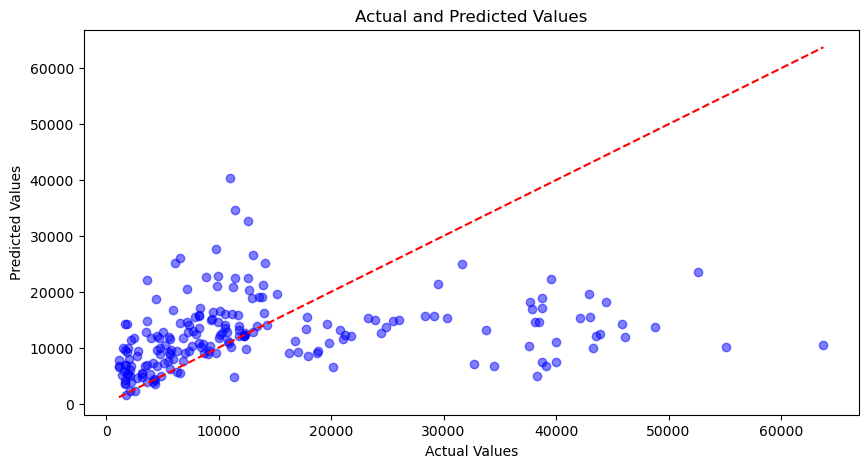

In [161]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred_knn,alpha=0.5,color="blue",label="Predictions")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual and Predicted Values")
plt.show()

## Fitting data to a Ridge Regression

In [124]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train,y_train)
y_pred_ridge = ridge.predict(x_test)

print('mean_absolute_error : ',mean_absolute_error(y_test,y_pred_ridge))
print('mean_squared_error : ',mean_squared_error(y_test,y_pred_ridge))
print('r2_score : ' ,r2_score(y_test,y_pred_ridge))

mean_absolute_error :  4228.056172829156
mean_squared_error :  35786245.51415887
r2_score :  0.798822587639481


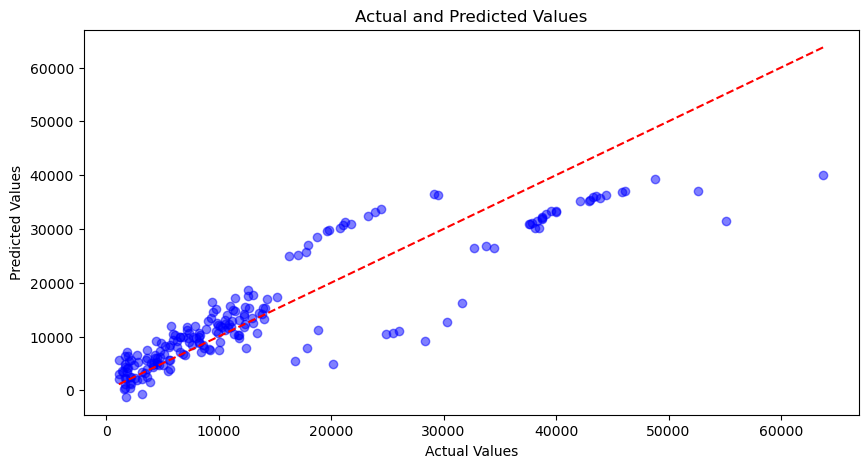

In [157]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred_ridge,alpha=0.5,color="blue",label="Predictions")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual and Predicted Values")
plt.show()